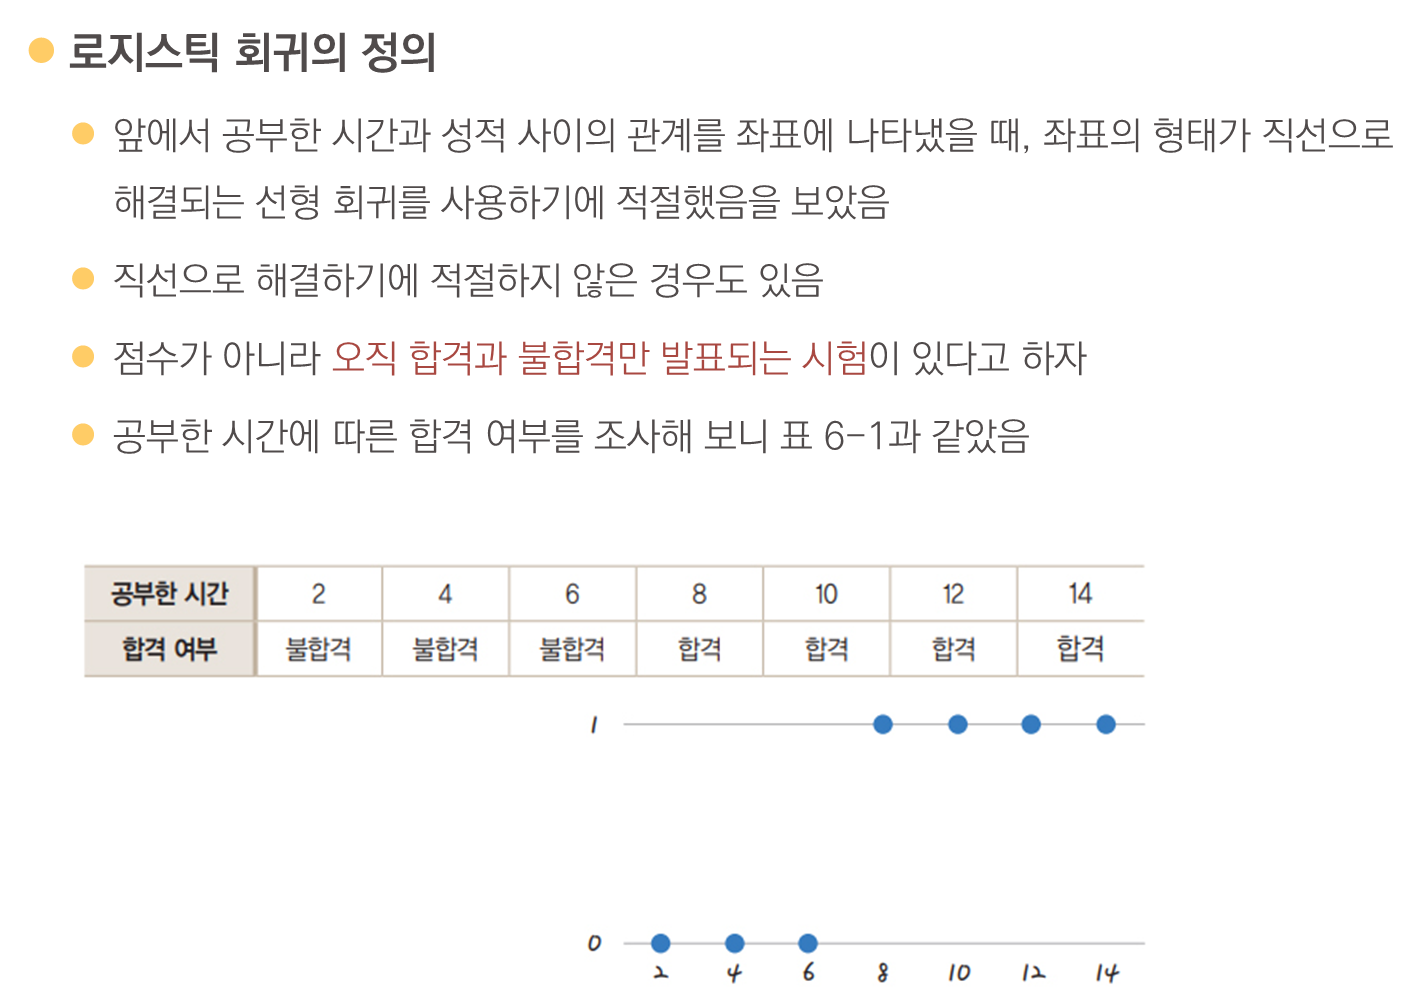

## 로지스틱 회귀 예제

In [10]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], 
                 [4, 0], 
                 [6, 0], 
                 [8, 1], 
                 [10, 1], 
                 [12, 1], 
                 [14, 1]])
data

array([[ 2,  0],
       [ 4,  0],
       [ 6,  0],
       [ 8,  1],
       [10,  1],
       [12,  1],
       [14,  1]])

In [11]:
# X,Y 분리
X = data[:, :-1]
Y = data[:, -1]
X.shape, Y.shape

((7, 1), (7,))

In [26]:
# 하이퍼 파라미터 설정
a, b = 100, 10 # 가중치와 편향 초기값
lr = 0.1       # 학습률
epochs = 1000  # 학습 횟수

# 시그모이드 함수 정의
def sigmoid(z):
    return 1/ (1 + np.exp(-z)) # 시그모이드 함수 구현

# Loss 함수 정의(로그 손실 함수) : binary_crossemtropy 함수
def loss(Y, Y_pred):
    Y_pred = sigmoid(a * X + b)
    return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

epoch=0, 기울기a=99.6571, 절편b=9.9143  Cost=1.7354  Accuracy=0.5714
epoch=50, 기울기a=82.5143, 절편b=5.6286  Cost=1.7354  Accuracy=0.5714
epoch=100, 기울기a=65.3714, 절편b=1.3429  Cost=1.7354  Accuracy=0.5714
epoch=150, 기울기a=48.2286, 절편b=-2.9429  Cost=1.7354  Accuracy=0.5714
epoch=200, 기울기a=31.0857, 절편b=-7.2286  Cost=1.7354  Accuracy=0.5714
epoch=250, 기울기a=13.9429, 절편b=-11.5143  Cost=1.7354  Accuracy=0.5714
epoch=300, 기울기a=2.0650, 절편b=-14.2327  Cost=1.7494  Accuracy=1.0000
epoch=350, 기울기a=2.0638, 절편b=-14.2821  Cost=1.7502  Accuracy=1.0000
epoch=400, 기울기a=2.0706, 절편b=-14.3300  Cost=1.7501  Accuracy=1.0000
epoch=450, 기울기a=2.0774, 절편b=-14.3775  Cost=1.7500  Accuracy=1.0000
epoch=500, 기울기a=2.0841, 절편b=-14.4248  Cost=1.7499  Accuracy=1.0000
epoch=550, 기울기a=2.0908, 절편b=-14.4717  Cost=1.7499  Accuracy=1.0000
epoch=600, 기울기a=2.0974, 절편b=-14.5183  Cost=1.7498  Accuracy=1.0000
epoch=650, 기울기a=2.1040, 절편b=-14.5646  Cost=1.7497  Accuracy=1.0000
epoch=700, 기울기a=2.1105, 절편b=-14.6106  Cost=1.7496  Accuracy=1.0000


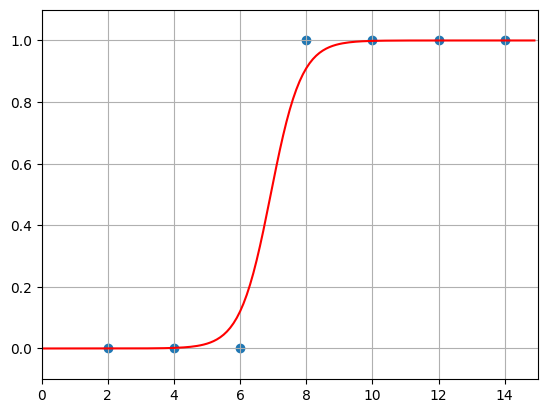

In [46]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 100, 10  # 기울기, 절편
lr = 0.1        # 학습률

#시그모이드 함수를 정의합니다.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    return - (Y * np.log(sigmoid(a * X + b)) +(1 - Y) * np.log(1 - sigmoid(X))).mean()


accuracy_history, cost_history = [], []
#경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수  
    
    a = a - lr * a_diff     # 실수
    b = b - lr * b_diff     # 실수

    accuracy = ((sigmoid(a * X + b) > 0.5) == Y).mean()
    accuracy_history.append(accuracy)
    
    cost_history.append(cost(a, b))
    if i % 50 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기a=%.04f, 절편b=%.04f  Cost=%.4f  Accuracy=%.4f" % 
              (i, a, b, cost(a, b), accuracy))

# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(a * x_range + b), "r")
plt.grid()
plt.show()

In [39]:
# 최종 예측값 확인(sigmoid 결과 : 1일 확률)
Y_hat = sigmoid(a * X + b).round(3)
Y_hat

array([0.   , 0.002, 0.121, 0.91 , 0.999, 1.   , 1.   ])

In [40]:
# 0.5 기준으로 1, 0 분류
Y_pred = (Y_hat > 0.5).astype(int) # Y 에측값
Y_pred

array([0, 0, 0, 1, 1, 1, 1])

In [41]:
# 정답
Y

array([0, 0, 0, 1, 1, 1, 1])

In [42]:
accuracy = (Y == Y_pred).mean() # 정확도 계산
print("정확도:", accuracy)

정확도: 1.0


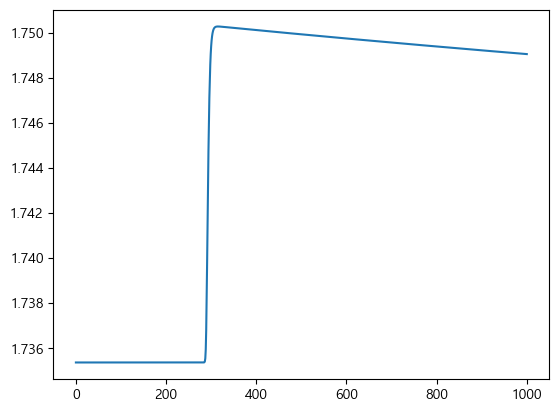

In [52]:
## Cost 와 Accuracy 변화 그래프
plt.plot(cost_history, label='Cost')

C:\Users\admin\AppData\Local\Temp\ipykernel_1360\289377528.py:29: RuntimeWarning: divide by zero encountered in log
  return - (Y * np.log(sigmoid(Z)) + (1 - Y) * np.log(1 - sigmoid(Z))).mean()
C:\Users\admin\AppData\Local\Temp\ipykernel_1360\289377528.py:29: RuntimeWarning: invalid value encountered in multiply
  return - (Y * np.log(sigmoid(Z)) + (1 - Y) * np.log(1 - sigmoid(Z))).mean()


epoch=0, 기울기=9.6571, 절편=9.9143  Cost=nan   Accuracy=0.5714


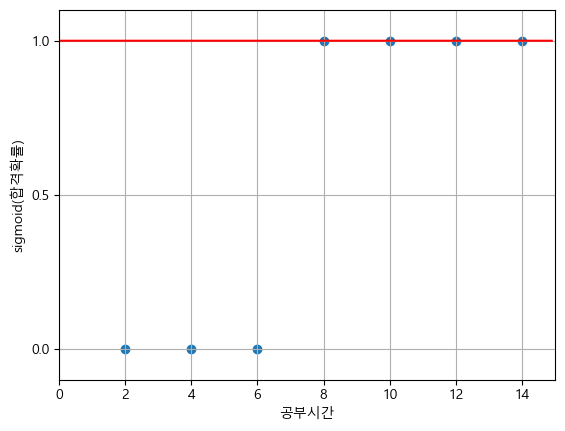

epoch=50, 기울기=-0.5426, 절편=6.2026  Cost=2.1669   Accuracy=0.2857


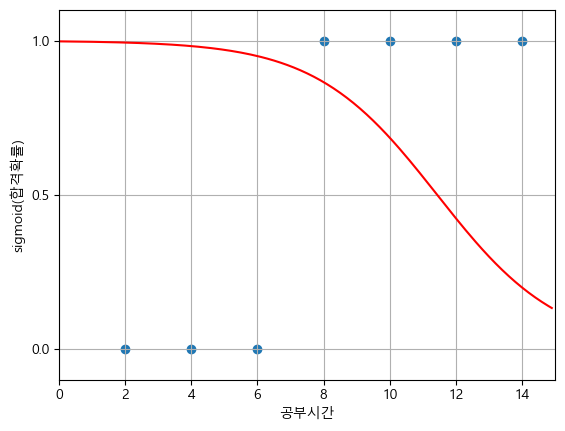

epoch=100, 기울기=-0.3142, 절편=3.4528  Cost=1.4227   Accuracy=0.2857


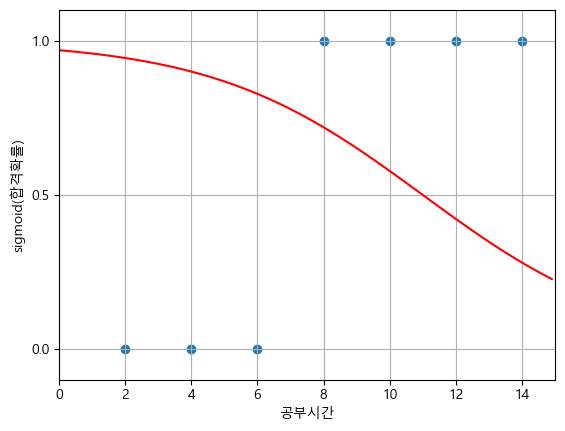

epoch=150, 기울기=-0.0336, 절편=1.0510  Cost=0.7714   Accuracy=0.5714


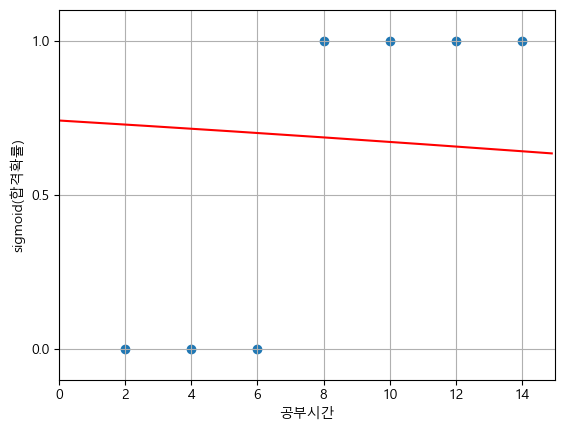

epoch=200, 기울기=0.1558, 절편=-0.6935  Cost=0.4684   Accuracy=0.8571


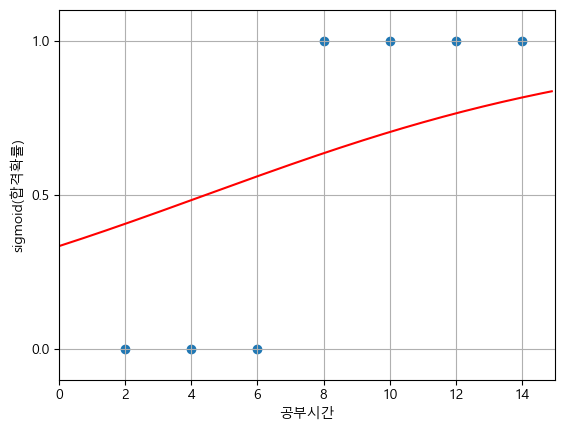

epoch=250, 기울기=0.3440, 절편=-1.7984  Cost=0.3239   Accuracy=0.8571


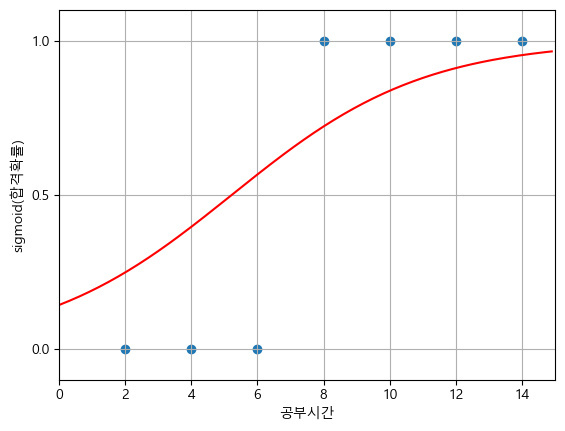

epoch=300, 기울기=0.4423, 절편=-2.5839  Cost=0.2610   Accuracy=0.8571


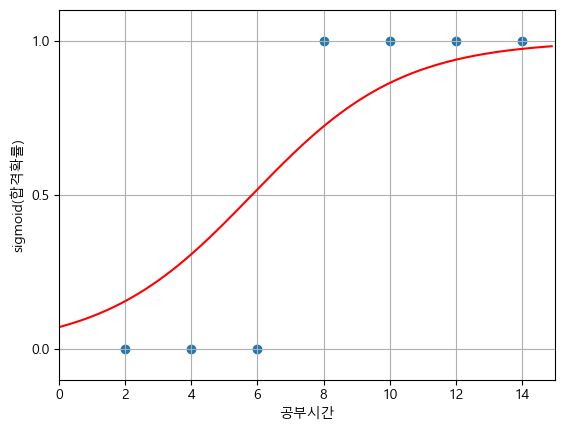

epoch=350, 기울기=0.5205, 절편=-3.1921  Cost=0.2233   Accuracy=1.0000


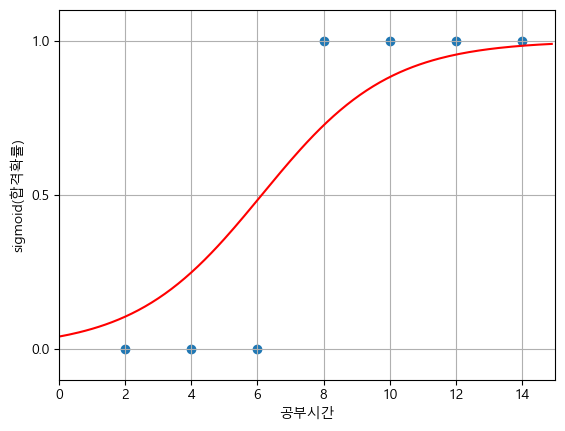

epoch=400, 기울기=0.5856, 절편=-3.6899  Cost=0.1981   Accuracy=1.0000


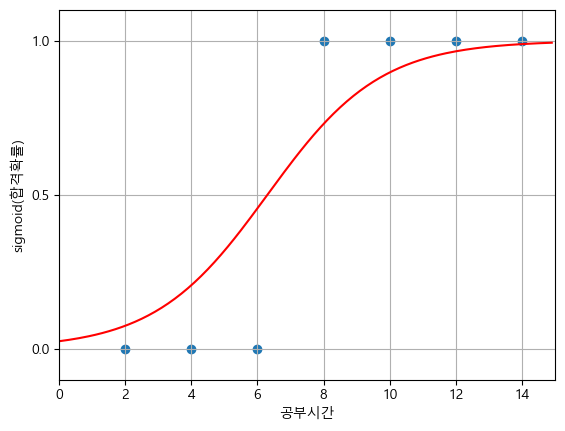

epoch=450, 기울기=0.6417, 절편=-4.1134  Cost=0.1798   Accuracy=1.0000


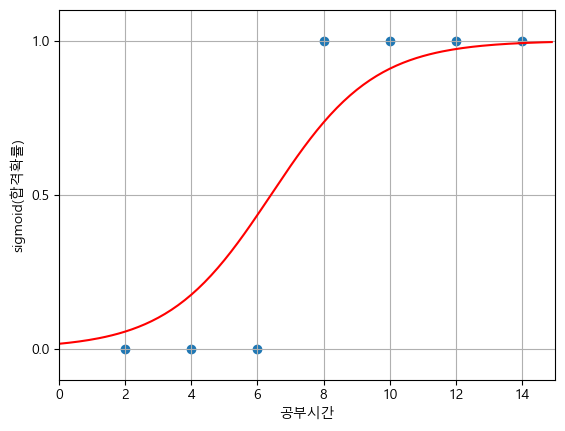

epoch=500, 기울기=0.6912, 절편=-4.4836  Cost=0.1659   Accuracy=1.0000


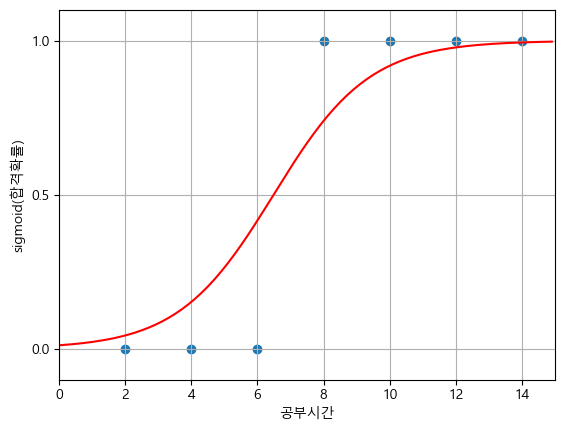

epoch=550, 기울기=0.7357, 절편=-4.8138  Cost=0.1548   Accuracy=1.0000


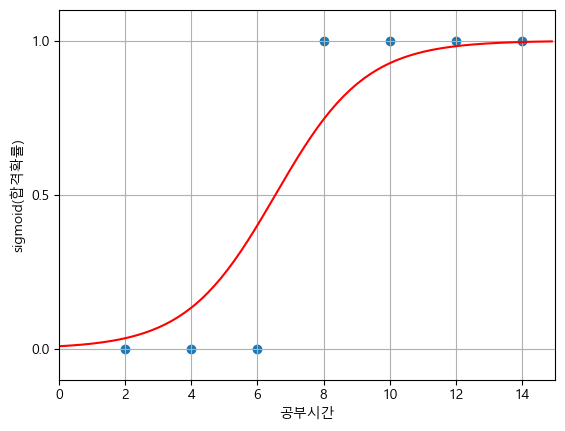

epoch=600, 기울기=0.7762, 절편=-5.1128  Cost=0.1457   Accuracy=1.0000


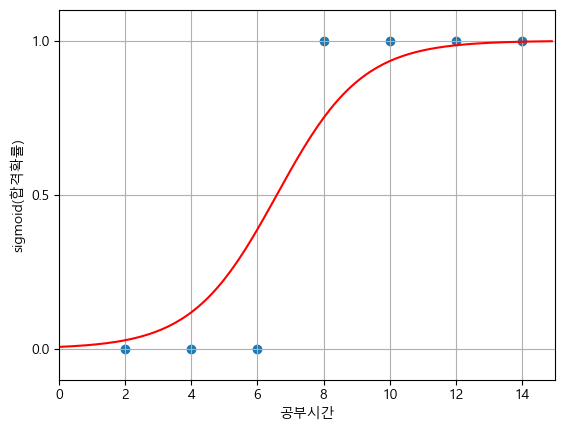

epoch=650, 기울기=0.8135, 절편=-5.3868  Cost=0.1380   Accuracy=1.0000


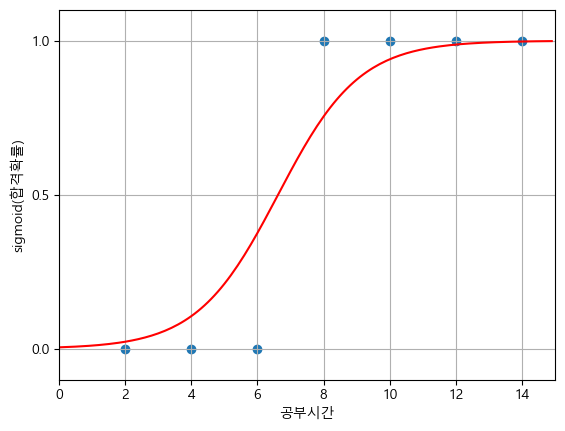

epoch=700, 기울기=0.8482, 절편=-5.6404  Cost=0.1315   Accuracy=1.0000


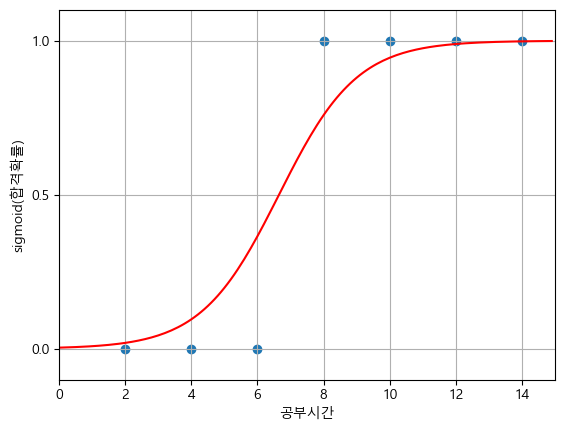

epoch=750, 기울기=0.8806, 절편=-5.8768  Cost=0.1258   Accuracy=1.0000


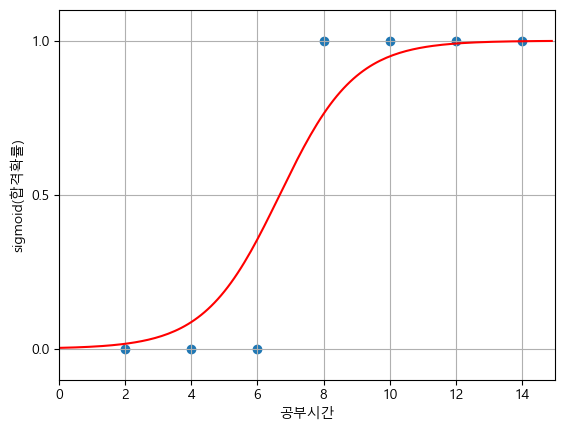

epoch=800, 기울기=0.9111, 절편=-6.0987  Cost=0.1208   Accuracy=1.0000


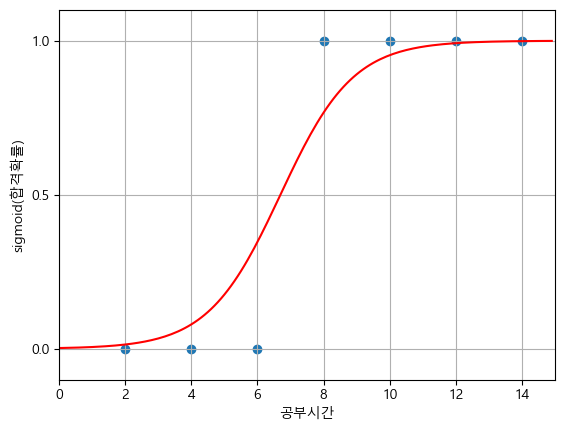

epoch=850, 기울기=0.9400, 절편=-6.3080  Cost=0.1163   Accuracy=1.0000


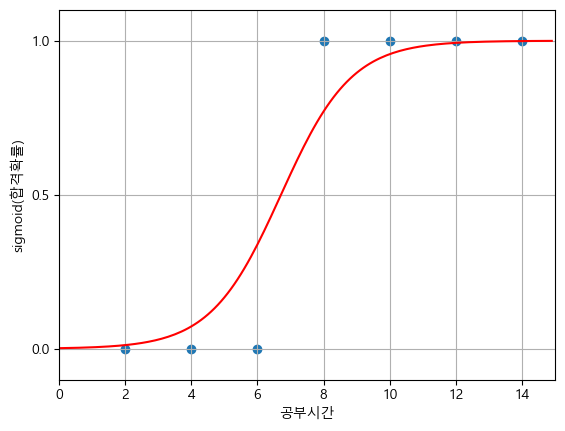

epoch=900, 기울기=0.9674, 절편=-6.5065  Cost=0.1123   Accuracy=1.0000


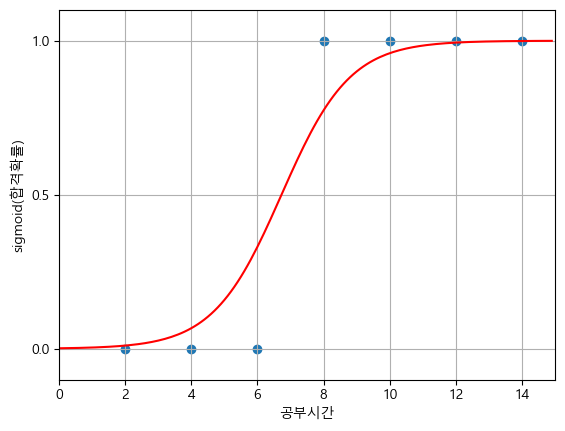

epoch=950, 기울기=0.9936, 절편=-6.6954  Cost=0.1086   Accuracy=1.0000


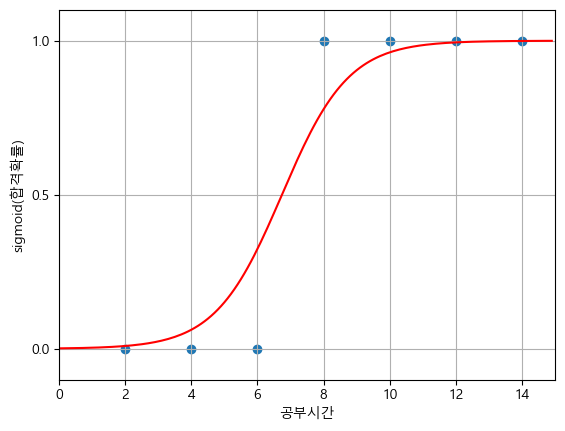

epoch=1000, 기울기=1.0186, 절편=-6.8757  Cost=0.1053   Accuracy=1.0000


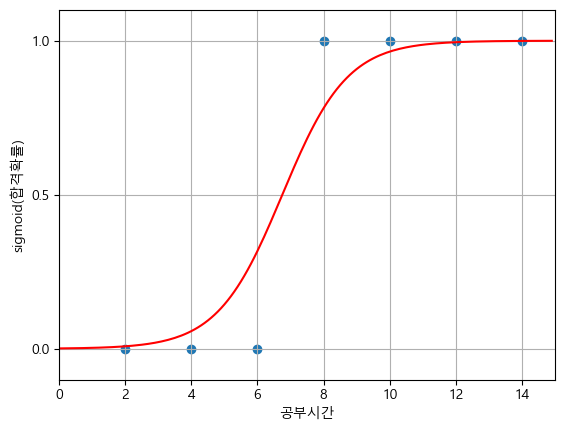

In [2]:
### 학습 과정을 시각화 한 코드

#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 10, 10  # 기울기, 절편
lr = 0.1        # 학습률
a_list, b_list, cost_list, accuracy_list = [], [], [], []

#시그모이드 함수를 정의합니다.
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    Z = a * X + b
    return - (Y * np.log(sigmoid(Z)) + (1 - Y) * np.log(1 - sigmoid(Z))).mean()

# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
def plot(a, b):
    plt.scatter(X, Y)   # X: (7, ), Y:(7, )
    plt.xlim(0, 15)
    plt.ylim(-.1, 1.1)
    plt.yticks([0, 0.5, 1])
    x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
    plt.plot(x_range, sigmoid(a * x_range + b),"r")
    plt.xlabel('공부시간')
    plt.ylabel('sigmoid(합격확률)')
    plt.grid()
    plt.show()

# 경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수  
    
    a = a - lr * a_diff     # 기울기 a 업데이트
    b = b - lr * b_diff     # 기울기 b 업데이트
    
    a_list.append(a)
    b_list.append(b)
    cost_list.append(cost(a, b))
    acc = ((sigmoid(a * X + b) > 0.5) == Y).mean()
    accuracy_list.append(acc)
    
    if i % 50 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f   Accuracy=%.4f" % 
              (i, a, b, cost(a, b), acc))
        plot(a, b)

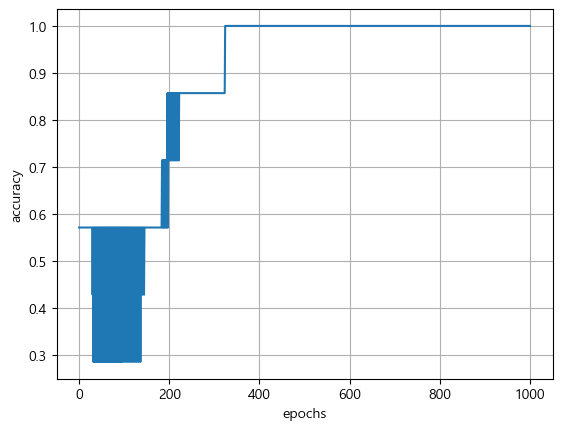

In [ ]:
plt.title('epochs에 따른 accuracy의 변화')
plt.plot(accuracy_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

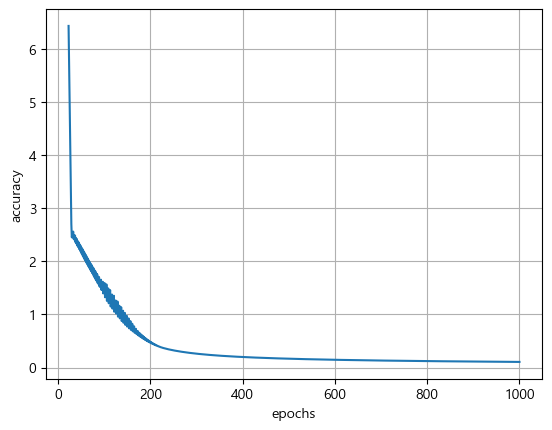

In [ ]:
plt.title('epochs에 따른 cost의 변화')
plt.plot(cost_list)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()
plt.show()

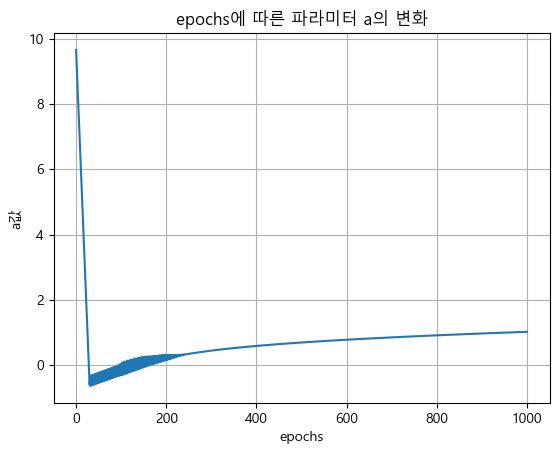

In [55]:
plt.title('epochs에 따른 파라미터 a의 변화')
plt.plot(a_list)
plt.xlabel('epochs')
plt.ylabel('a값')
plt.grid()
plt.show()

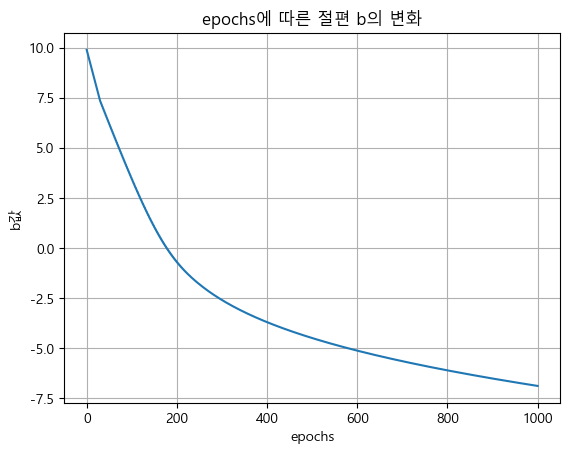

In [56]:
plt.title('epochs에 따른 절편 b의 변화')
plt.plot(b_list)
plt.xlabel('epochs')
plt.ylabel('b값')
plt.grid()
plt.show()

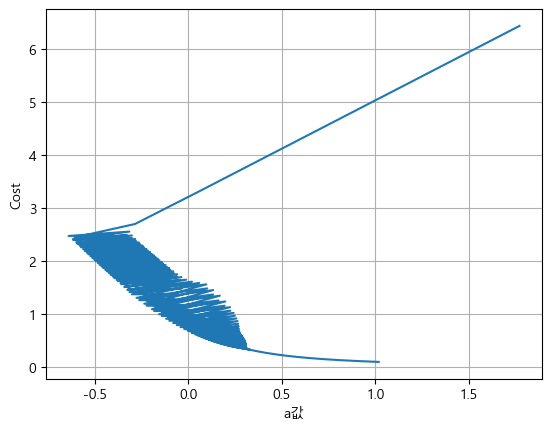

In [58]:
# a(기울기)에 따른 Cost의 변화
plt.plot(a_list, cost_list)
plt.xlabel('a값')
plt.ylabel('Cost')
plt.grid()
plt.show()

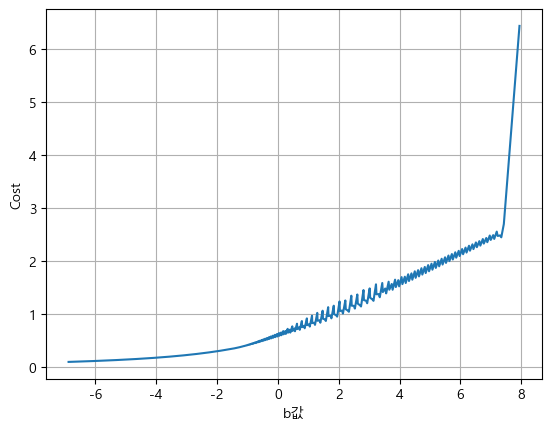

In [60]:
# b(저류ㅕㄴ)에 따른 Cost의 변화
plt.plot(b_list, cost_list)
plt.xlabel('b값')
plt.ylabel('Cost')
plt.grid()
plt.show()

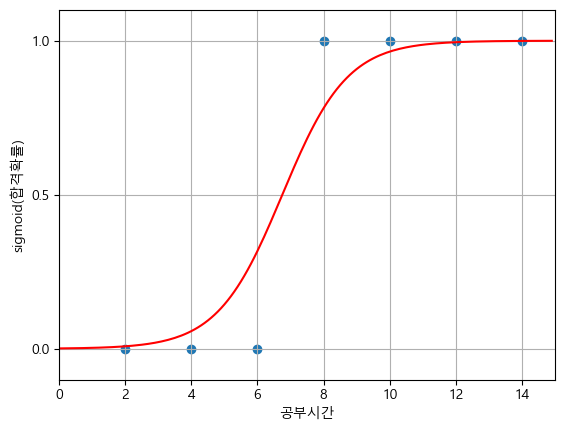

In [61]:
plot(a,b)

In [62]:
## 임의의 학습시간에 따른 합격확률 예측
study_time = 7 # 임의의 공부시간
pass_prob = sigmoid(a * study_time + b)
pass_prob

np.float64(0.5632215859225729)

In [63]:
study_time = np.array([5, 7, 9]) # 임의의 공부시간
pass_prob = sigmoid(a * study_time + b)
pass_prob

array([0.14394708, 0.56322159, 0.90816067])

### 다중 로지스틱 회귀

In [3]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제 (다중 로지스틱 회귀)
#################################################################
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 3, 0],
                 [4, 3, 0], 
                 [6, 4, 0], 
                 [8, 6, 1], 
                 [10, 7, 1],
                 [12, 8, 1],
                 [14, 9, 1]], dtype=np.float32) # shape: (7, 1)

X = data[:, :2]  # shape: (7,2)
Y = data[:, 2]  # shape: (7, )

# 임의의 초기값 설정
W = np.array([2, 1])  # 기울기, 절편
b = 0
lr = 0.1        # 학습률
epochs = 500
W_list, cost_list, accuracy_list = [], [], []

#시그모이드 함수를 정의합니다.
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))  # shape: (7, )

# cost 함수 정의
def cost(Z):  # 실수
    return - (Y * np.log(sigmoid(Z)) + (1 - Y) * np.log(1 - sigmoid(Z))).mean()


# 경사 하강법을 실행합니다.
for i in range(epochs+1):
    Z = np.dot(X, W) + b
    error = sigmoid(Z) - Y  # 편차 : shape: (7, )
    error = error.reshape(-1, 1)
    dLoss_dW = 2 * (error * X).mean(axis=0)   # (2,) shape
    dLoss_db = 2 * error.mean()         # 실수  
    
    W = W - lr * dLoss_dW     # 기울기 a 업데이트
    b = b - lr * dLoss_db     # 기울기 b 업데이트
    
    W_list.append(W)
    b_list.append(b)
    Z = np.dot(X, W) + b
    cost_list.append(cost(Z))
    acc = ((sigmoid(Z) > 0.5) == Y).mean()
    accuracy_list.append(acc)
    
    if i % 10 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, W[0]=%.04f, W[1]=%.04f, 절편=%.04f  Cost=%.4f  Accuracy=%.1f" % 
              (i, W[0], W[1], b, cost(Z), acc))

epoch=0, W[0]=1.6572, W[1]=0.7144, 절편=-0.0857  Cost=3.8254  Accuracy=0.6
epoch=10, W[0]=0.6122, W[1]=-0.2957, 절편=-0.5522  Cost=0.5864  Accuracy=0.7
epoch=20, W[0]=0.6033, W[1]=-0.4651, 절편=-0.8219  Cost=0.4091  Accuracy=0.7
epoch=30, W[0]=0.8680, W[1]=-0.3898, 절편=-1.0216  Cost=0.6787  Accuracy=0.7
epoch=40, W[0]=0.8134, W[1]=-0.5208, 절편=-1.2483  Cost=0.4450  Accuracy=0.7
epoch=50, W[0]=0.9142, W[1]=-0.5169, 절편=-1.4368  Cost=0.5069  Accuracy=0.7
epoch=60, W[0]=0.9188, W[1]=-0.5635, 절편=-1.6229  Cost=0.4339  Accuracy=0.7
epoch=70, W[0]=0.9377, W[1]=-0.5846, 절편=-1.7930  Cost=0.4022  Accuracy=0.7
epoch=80, W[0]=0.9481, W[1]=-0.5996, 절편=-1.9523  Cost=0.3715  Accuracy=0.7
epoch=90, W[0]=0.9533, W[1]=-0.6085, 절편=-2.1017  Cost=0.3446  Accuracy=0.9
epoch=100, W[0]=0.9542, W[1]=-0.6125, 절편=-2.2422  Cost=0.3209  Accuracy=0.9
epoch=110, W[0]=0.9513, W[1]=-0.6126, 절편=-2.3750  Cost=0.3001  Accuracy=0.9
epoch=120, W[0]=0.9452, W[1]=-0.6097, 절편=-2.5007  Cost=0.2820  Accuracy=0.9
epoch=130, W[0]=0.9363, 

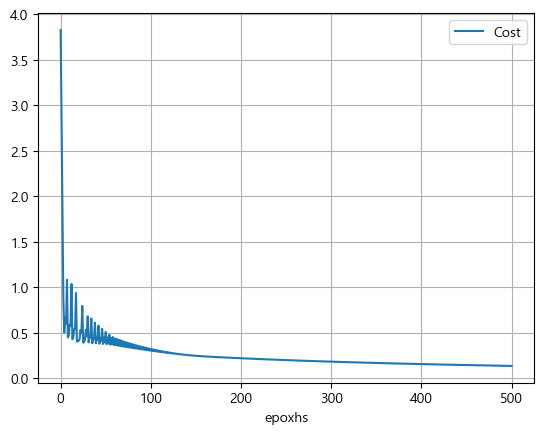

In [5]:
plt.plot(cost_list, label="Cost")
plt.xlabel('epoxhs')
plt.legend()
plt.grid()
plt.show()

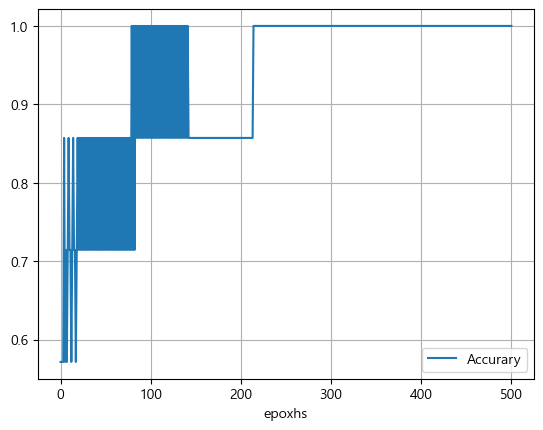

In [4]:
plt.plot(accuracy_list, label="Accurary")
plt.xlabel('epoxhs')
plt.legend()
plt.grid()
plt.show()

In [17]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
### 단순 로지스틱 회귀 - Scikit Learn으로 풀기
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, :-1]  # shape: (7, 1) # shape에 주의!!! -> 반드시 2차원이어야 함
Y = data[:, 1]  # shape: (7, )
X, Y


(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10],
        [12],
        [14]]),
 array([0, 0, 0, 1, 1, 1, 1]))

In [18]:

# 모뎉 생성 및 학습
logistic_r = LogisticRegression()
logistic_r.fit(X, Y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
logistic_r.score(X, Y) # 분류문제이므로 score-> accuaracy 변환

1.0

In [20]:
X.shape

(7, 1)

In [21]:
new_X = np.array([[7]])
logistic_r.predict(new_X)

array([1])

In [24]:
# 5시간, 6.5시간 공부하면 합격 여부?
new_X = np.array([[5],
                  [6.5],
                  [7.5]])
logistic_r.predict(new_X)

array([0, 0, 1])

In [23]:
# 합격확률
logistic_r.predict_proba(new_X)

array([[0.87204225, 0.12795775],
       [0.61726745, 0.38273255],
       [0.38158757, 0.61841243]])

In [28]:
#################################################################
#  다중 로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
### 단순 로지스틱 회귀 - Scikit Learn으로 풀기
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 3, 0],
                 [4, 3, 0], 
                 [6, 4, 0], 
                 [8, 6, 1], 
                 [10, 7, 1],
                 [12, 8, 1],
                 [14, 9, 1]], dtype=np.float32) # shape: (7, 1)

X = data[:, :2]  # shape: (7,2)
Y = data[:, 2]  # shape: (7, )

logistic_r = LogisticRegression()
logistic_r.fit(X, Y)
logistic_r.score(X, Y)

1.0

In [32]:
# 합격 여부 예측
logistic_r.predict(X)

array([0., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [33]:
# [불합격확률, 합격확률]
logistic_r.predict_proba(X)

array([[9.91363173e-01, 8.63682661e-03],
       [9.65404762e-01, 3.45952381e-02],
       [7.88315831e-01, 2.11684169e-01],
       [2.14326920e-01, 7.85673080e-01],
       [3.51256500e-02, 9.64874350e-01],
       [4.83467849e-03, 9.95165322e-01],
       [6.47902491e-04, 9.99352098e-01]])

In [ ]:
######################################################
# 텐서플로에서 실행하는 로지스틱 회귀 모델
######################################################
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, :-1]  # shape: (7, 1)
Y = data[:, 1]  # shape: (7, )

## 모델 설계(2진 분류 ------> 활성화 함수를 'sigmoid'로 설정)
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

## Optimizer와 Loss함수 정의
## sgd : 경사하강법
## loss : 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정 
# model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
## 모델 학습 실행
hist = model.fit(X, Y, epochs=1000)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - accuracy: 0.5714 - loss: 2.7873
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5714 - loss: 2.6335
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5714 - loss: 2.4803
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5714 - loss: 2.3276
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5714 - loss: 2.1758
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5714 - loss: 2.0249
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5714 - loss: 1.8752
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5714 - loss: 1.7270
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5714 - loss: 1.5807
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5714 - loss: 1.4368
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5714 - loss: 1.2961
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accurac

In [ ]:
# 학습결과 딕셔너리
hist.history.keys()

dict_keys(['accuracy', 'loss'])

In [36]:
import pandas as pd
df_history = pd.DataFrame(hist.history)
df_history

,accuracy,loss
0,0.571429,2.787327
1,0.571429,2.633548
2,0.571429,2.480283
3,0.571429,2.327649
4,0.571429,2.175794
...,...,...
995,1.000000,0.186051
996,1.000000,0.185964
997,1.000000,0.185877
998,1.000000,0.185790


<Axes: >

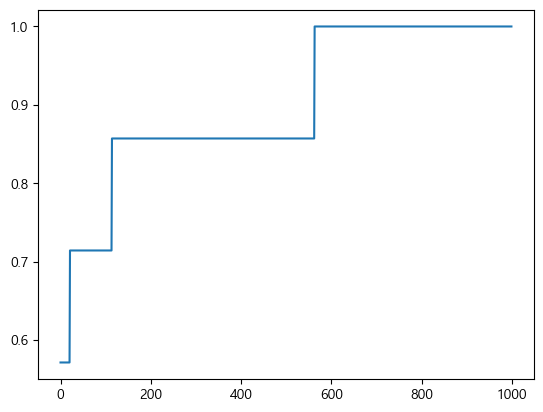

In [37]:
df_history['accuracy'].plot()

<Axes: >

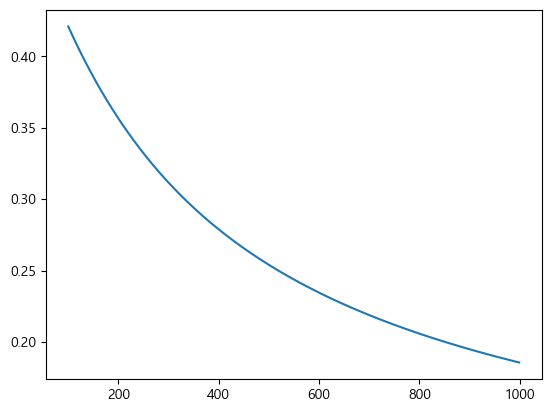

In [41]:
df_history['loss'][100:].plot()

In [45]:
# 임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
X_data = np.array([7])
prediction = model.predict(X_data, verbose=0)

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" 
      % (X_data[0], prediction[0][0] * 100))

7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


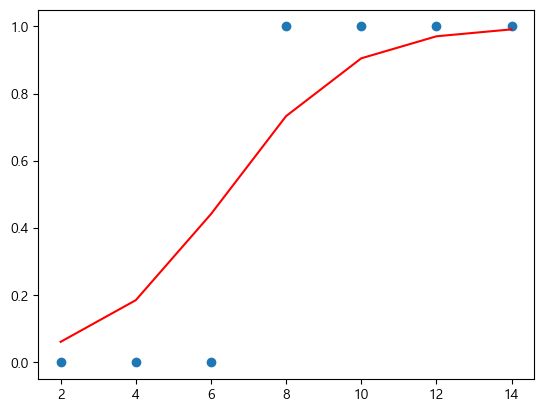

In [46]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X), 'r')
plt.show()

## Scikit Learn - 로지스틱 회귀

### 텐서플로에서 실행하는 로지스틱 회귀 모델

### 다중 로지스틱 회귀 예제
* Tensorflow 1.x버전 코드

In [ ]:
##############################################################
# 다중 로지스틱 회귀 
# - tf 1.x 코드
##############################################################
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import numpy as np

# 당뇨병 데이터 읽어오기
data = np.loadtxt('../data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = data[:, 0:-1]
y_data = data[:, [-1]]

# Placeholders : Shape 주의! 총 8개의 x_data와 1개의 y_data
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# Cost/Loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 정확도 hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# 세션 시작
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, acc, _ = sess.run([cost, accuracy, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, acc, cost_val)
            # 10000 0.480384

    # 정확도 77%
    _,  _, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})   
    #a = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 같이 해도 문제는 안됨
    #grph가 구성되어 있으므로
    print("Accuracy: ", a)
    # Accuracy: 0.769433

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  데이터 로드 (Iris 데이터셋)
iris = datasets.load_iris()
X = iris.data  # 특성 (꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)
y = iris.target  # 클래스 (setosa=0, versicolor=1, virginica=2)

#  데이터 분할 (훈련 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  데이터 표준화 (Standardization)
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#  다중 로지스틱 회귀 모델 학습
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model = LogisticRegression()
model.fit(X_train, y_train)

#  예측 수행
y_pred = model.predict(X_test)

#  모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'* 정확도: {accuracy:.4f}')
print('\n* 혼동 행렬:\n', conf_matrix)
print('\n* 분류 보고서:\n', class_report)

# 시각화: 첫 번째 두 특성에 대한 결정 경계
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                color=colors[i], label=labels[i], marker=markers[i], edgecolor='k')
plt.xlabel('꽃받침 길이 (표준화)')
plt.ylabel('꽃받침 너비 (표준화)')
plt.title('Iris 데이터셋 - 로지스틱 회귀')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 로드 (Iris 데이터셋)
iris = datasets.load_iris()
X = iris.data[:, :3]  # 첫 3개 특성 선택 (꽃받침 길이, 꽃받침 너비, 꽃잎 길이)
y = iris.target  # 클래스 (setosa=0, versicolor=1, virginica=2)

# 데이터 분할 (훈련 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다중 로지스틱 회귀 모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'* 정확도: {accuracy:.4f}')
print('\n* 혼동 행렬:\n', conf_matrix)
print('\n* 분류 보고서:\n', class_report)

# 시각화: 첫 번째 세 특성에 대한 3D 산점도
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    ax.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], X_train[y_train == i, 2],
               color=colors[i], label=labels[i], marker=markers[i], edgecolor='k')

ax.set_xlabel('꽃받침 길이 (표준화)')
ax.set_ylabel('꽃받침 너비 (표준화)')
ax.set_zlabel('꽃잎 길이 (표준화)')
ax.set_title('Iris 데이터셋 - 로지스틱 회귀 (3D 시각화)')
ax.legend()
plt.show()
